# 4.10 Part I Task #5-6

This script contains the following points:

1. Create profiling variables (except department; for dept, see notebook 4-10b-Dept)
2. Create appropriate visualizations to show distribution of profiles
3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
4. Export the visualizations

In [58]:
    # Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [59]:
      #Import dataframe
path = r'C:\Users\Barb\07-2024 Instacart Basket Analysis'

In [60]:
orders_products_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'orders_products_high410a.pkl'))

In [61]:
     #Check output

In [62]:
orders_products_high.shape

(29303281, 35)

In [63]:
orders_products_high.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marriage_status,income,...,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,buy_frequency,frequency_flag,_merge,region,customer_activity_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity


## Task #5 - Create profiling variable based on age, income, certain goods in the "department_id" column, and number_of_dependents 

### 5.1 Customer profile:   age_group

In [66]:
orders_products_high.loc[orders_products_high['age']<=30,'age_group']='young_adult'

In [67]:
orders_products_high.loc[(orders_products_high['age'] > 30) & (orders_products_high['age'] <= 60),'age_group']='middle-aged_adult'

In [68]:
orders_products_high.loc[(orders_products_high['age'] > 60),'age_group']='senior'

In [69]:
orders_products_high['age_group'].value_counts()

age_group
middle-aged_adult    13769037
senior                9568464
young_adult           5965780
Name: count, dtype: int64

### 5.2 Customer profile:  income_class

In [71]:
orders_products_high.loc[orders_products_high['income']<= 50000,'income_class']='lower_class'

In [72]:
orders_products_high.loc[(orders_products_high['income'] > 50000) & (orders_products_high['income'] <= 100000),'income_class']='middle_class'

In [73]:
orders_products_high.loc[orders_products_high['income'] > 100000,'income_class']='upper_class'

In [74]:
orders_products_high['income_class'].value_counts()

income_class
upper_class     13450870
middle_class    12684530
lower_class      3167881
Name: count, dtype: int64

### 5.3 Customer profile:  dependents_flag

In [76]:
orders_products_high.loc[orders_products_high['number_of_dependents'] == 0,'dependents_flag']='no_dependents'

In [77]:
orders_products_high.loc[(orders_products_high['number_of_dependents'] > 0) & (orders_products_high['number_of_dependents'] <= 2),'dependents_flag']='small_family'

In [78]:
orders_products_high.loc[(orders_products_high['number_of_dependents'] > 2),'dependents_flag']='large_family'

In [79]:
orders_products_high['dependents_flag'].value_counts()

dependents_flag
small_family     14620951
large_family      7357443
no_dependents     7324887
Name: count, dtype: int64

### 5.4 Customer profile:  certain goods in the 'department_id' column

#### See notebook 4-10b-Dept

### Task #6 - Create an appropriate visualization to show the distribution of profiles

#### 6.1 Age_group - Bar Graph

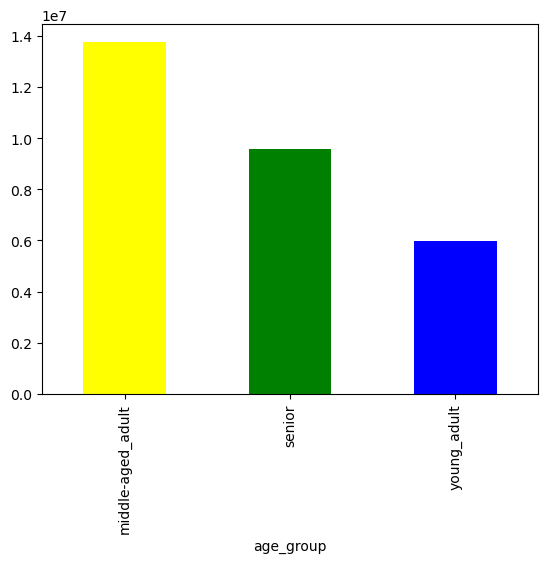

In [105]:
bar_age_group = orders_products_high['age_group'].value_counts().plot.bar(color =['yellow', 'green', 'blue'])

#### 6.2 Income_class - Bar Graph

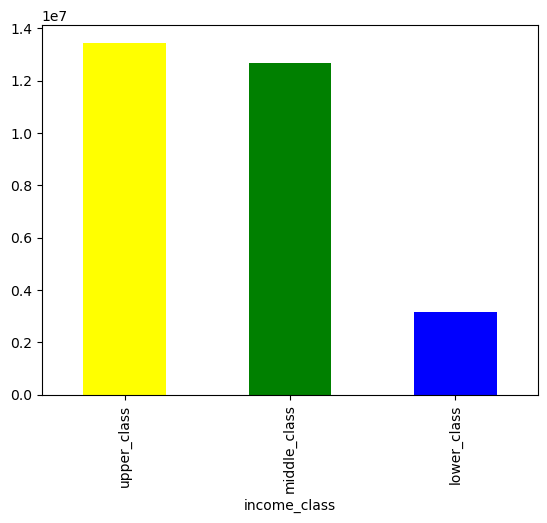

In [107]:
bar_income_class = orders_products_high['income_class'].value_counts().plot.bar(color =['yellow', 'green', 'blue'])

#### 6.3 Dependents_flag - Bar Graph

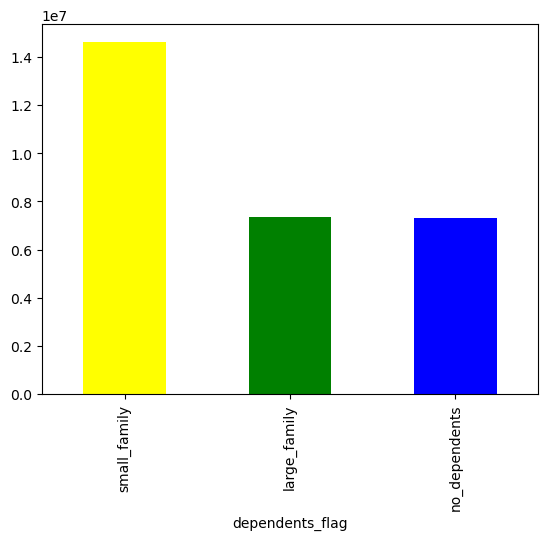

In [109]:
bar_dependents_flag = orders_products_high['dependents_flag'].value_counts().plot.bar(color =['yellow', 'green', 'blue'])

### Export Visualizations

In [111]:
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

In [112]:
bar_income_class.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_class.png'))

In [113]:
bar_dependents_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependents_flag.png'))

### Export dataframe

In [115]:
orders_products_high.to_pickle(os.path.join(path, '02 Data', 'Prepared', 'orders_products_high_410b.pkl'))